In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.datasets import mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train[:20]
y_train = y_train[:20]

In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (20, 28, 28)
The shape of the training labels: (20,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


In [ ]:
X_train = X_train.reshape(20, 28*28) / 127.5 - 1

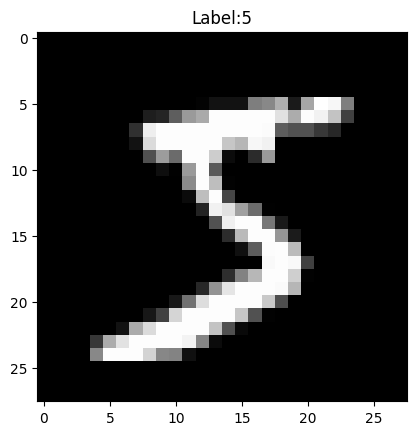

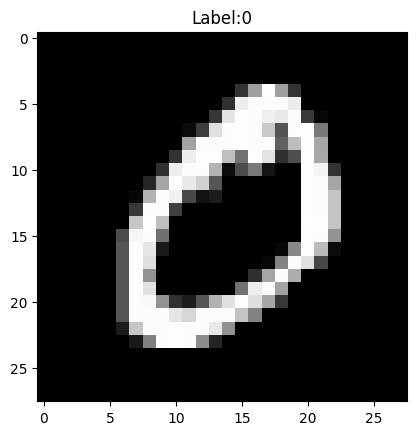

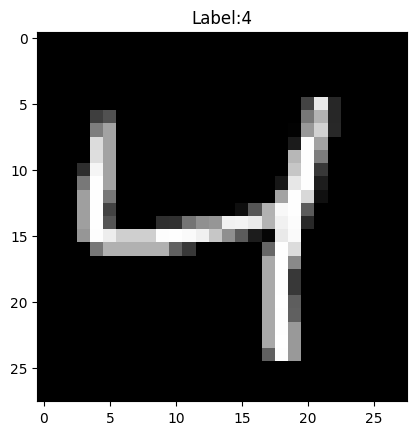

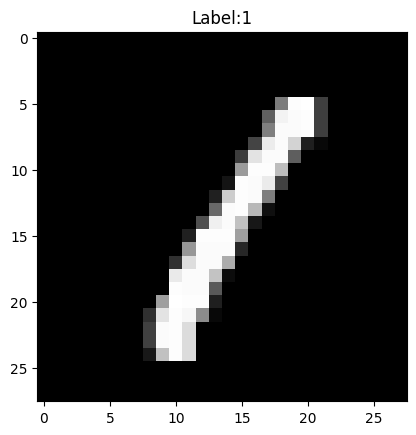

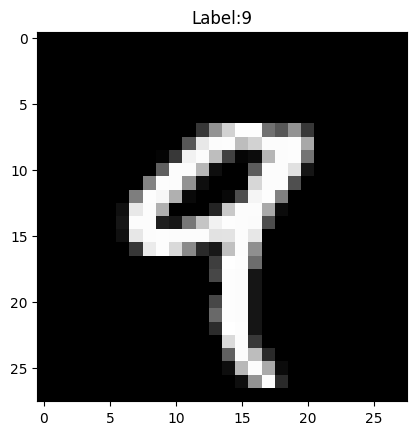

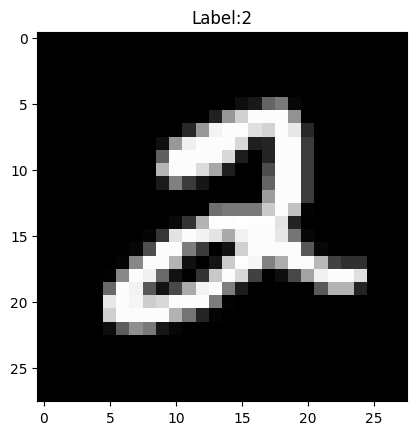

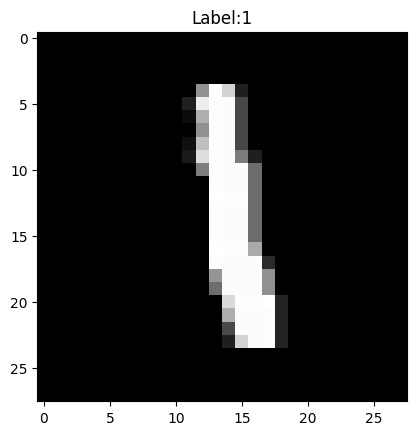

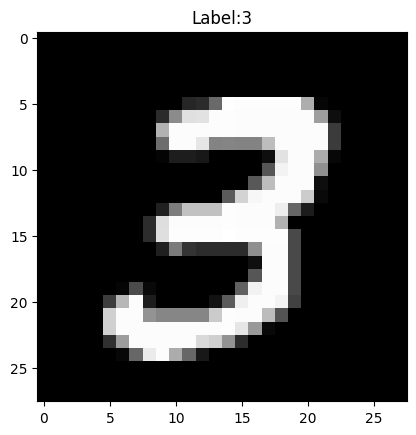

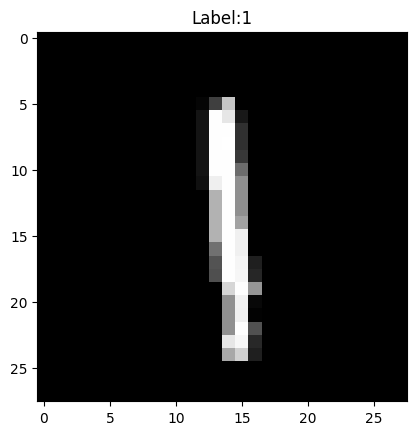

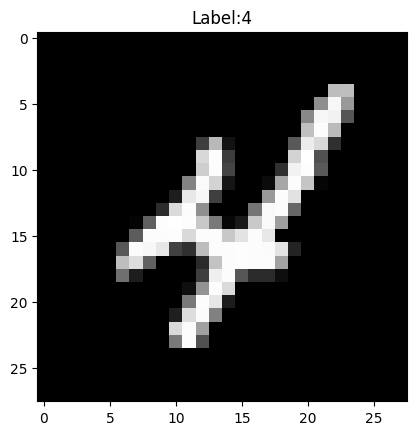

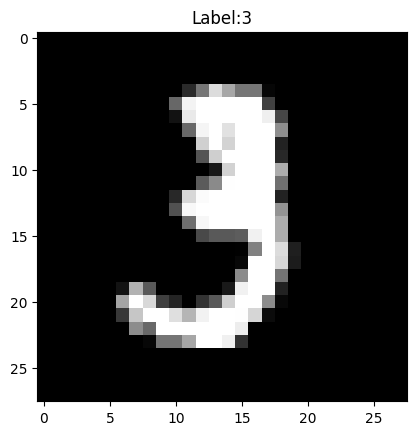

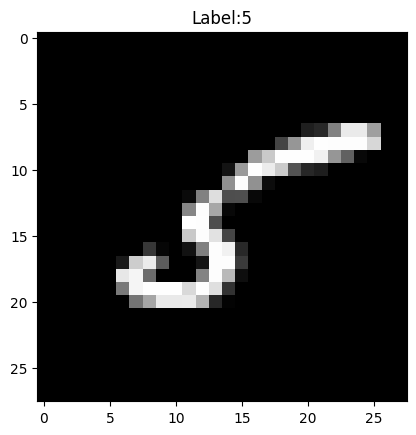

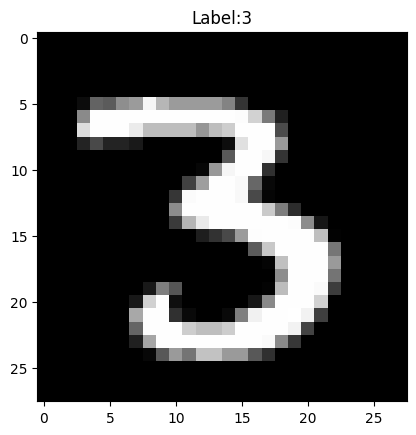

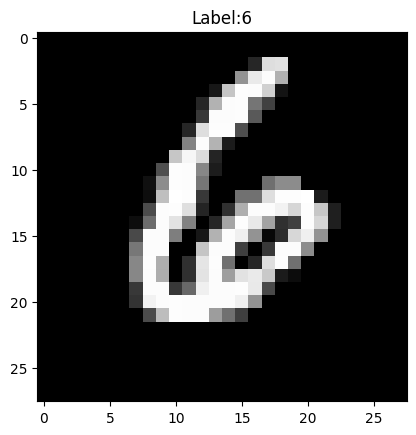

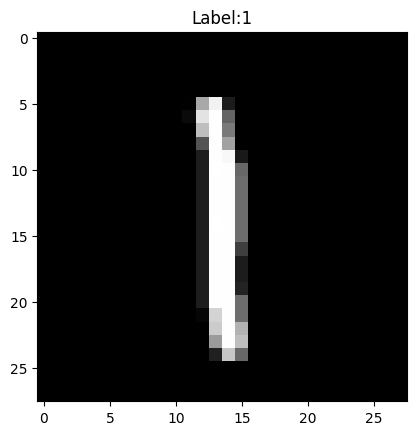

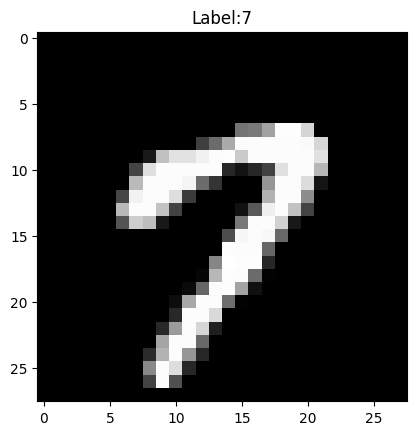

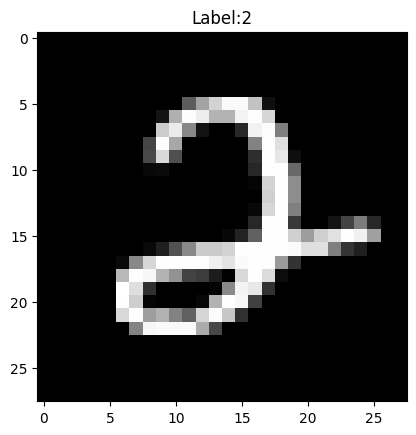

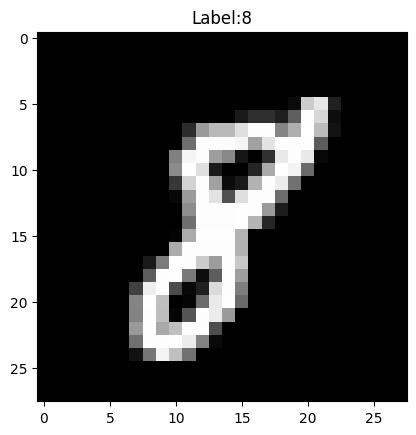

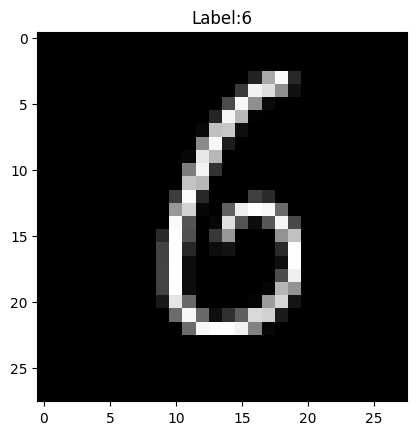

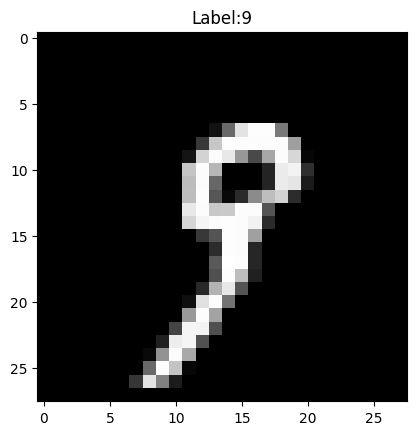

In [ ]:
for img,label in zip(X_train,y_train):
    plt.imshow(img.reshape(28,28),cmap="gray")
    plt.title(f"Label:{label}")
    plt.show()

In [ ]:
# Convert labels to bipolar encoding (-1 for non-target, 1 for target)
def to_bipolar(y, num_classes=10):
    bipolar = -np.ones((len(y), num_classes))
    for i, label in enumerate(y):
        bipolar[i, label] = 1
    return bipolar

y_train_bipolar = to_bipolar(y_train)

In [ ]:
y_train_bipolar

array([[-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.

In [ ]:
def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def bipolar_sigmoid_derivative(y):
    # Note: y is already phi(x)
    return 0.5 * (1 + y) * (1 - y)

In [ ]:
input_size = 784 #input layer
hidden_size = 64  # hidden layer
output_size = 10 # output layer
learning_rate = 0.1
epochs = 5

In [ ]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.uniform(-0.5, 0.5, (input_size, hidden_size))
b1 = np.zeros(hidden_size)
W2 = np.random.uniform(-0.5, 0.5, (hidden_size, output_size))
b2 = np.zeros(output_size)

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    total_error = 0 
    correct = 0 
    total = 0 
    i=0
    for x, t in zip(X_train, y_train_bipolar): 
        # Forward pass 
        h_input = np.dot(x, W1) + b1 
        h_output = bipolar_sigmoid(h_input) 
        y_input = np.dot(h_output, W2) + b2 
        y_output = bipolar_sigmoid(y_input) 
        
        # Error calculation 
        error = t - y_output 
        total_error += np.sum(error**2) / 2 
        loss = np.mean(error ** 2)
        total_loss += loss
        
        # Prediction 
        y_pred = np.argmax(y_output) # predicted class 
        y_true = np.argmax(t) # true class 
        
        if y_pred == y_true: 
            correct += 1 
        total += 1 
            
        # Backpropagation 
        delta_output = error * bipolar_sigmoid_derivative(y_output) 
        delta_hidden = bipolar_sigmoid_derivative(h_output) * np.dot(W2, delta_output) 
            
        # Weight updates 
        w2_update = learning_rate * np.outer(h_output, delta_output)
        W2 += w2_update
        b2 += learning_rate * delta_output 

        w1_update = learning_rate * np.outer(x, delta_hidden)
        W1 += w1_update
        b1 += learning_rate * delta_hidden 

        # Detailed print only for epoch 5 and only for first 5 samples
        if epoch == epochs - 1 and i < 5:
            print(f"\nSample {i+1} \nForward Pass:")
            print(f"Calculate hidden layer weighted sums z1 = input_vector . W1")
            print(f"First 5 weighted sums: {np.round(h_input[:5], 5)}")

            print(f"Apply bipolar sigmoid activation to z1:")
            print(f"Hidden activations a1 (first 5): {np.round(h_output[:5], 5)}")

            print(f"\nCalculate output layer weighted sums z2 = a1 . W2")
            print(f"Output weighted sums z2 (first 5): {np.round(h_input[:5], 5)}")

            print(f"Apply bipolar sigmoid activation to z2:")
            print(f"Output activations a2 (first 5): {np.round(h_output[:5], 5)}")

            print(f"\nError Calculation:")
            print(f"Calculate error = target Y - output a2:")
            print(f"Error (first 5): {np.round(error[:5], 5)}")
            print(f"Mean squared error loss for sample: {loss:.7f}")

            print(f"\nBackpropagation:")
            print(f"Delta output layer (delta2) = error * derivative of bipolar sigmoid at a2")
            print(f"delta2 (first 5): {np.round(delta_output[:5], 7)}")

            print(f"Delta hidden layer (delta1) = (delta2 . W2.T) * derivative of bipolar sigmoid at a1")
            print(f"delta1 (first 5): {np.round(delta_hidden[:5], 7)}")

            print(f"\nWeight Updates:")
            print(f"W2 update = learning_rate * outer product of (a1, delta2)")
            print(f"W2 update (first row, first 5): {np.round(w2_update[0,:5], 8)}")

            print(f"W1 update = learning_rate * outer product of (input vector, delta1)")
            print(f"W1 update (first 5 input pixels, first hidden neuron): {np.round(w1_update[:5,0], 8)}")
            i += 1

    avg_loss = total_loss / len(X_train)
    accuracy = correct / len(X_train) * 100
    print(f"\nEpoch {epoch+1} Summary: Average Loss = {avg_loss:.5f}, Accuracy = {accuracy:.2f}%")
    

    accuracy = correct / total * 100 
    print(f"Epoch {epoch+1}/{epochs}, Error: {total_error:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1 Summary: Average Loss = 0.45825, Accuracy = 15.00%
Epoch 1/5, Error: 45.8254, Accuracy: 15.00%

Epoch 2 Summary: Average Loss = 0.34730, Accuracy = 25.00%
Epoch 2/5, Error: 34.7300, Accuracy: 25.00%

Epoch 3 Summary: Average Loss = 0.30497, Accuracy = 30.00%
Epoch 3/5, Error: 30.4969, Accuracy: 30.00%

Epoch 4 Summary: Average Loss = 0.27630, Accuracy = 45.00%
Epoch 4/5, Error: 27.6301, Accuracy: 45.00%

Sample 1 
Forward Pass:
Calculate hidden layer weighted sums z1 = input_vector . W1
First 5 weighted sums: [-3.76576 -0.14977 15.54831  3.08822 -4.28933]
Apply bipolar sigmoid activation to z1:
Hidden activations a1 (first 5): [-0.95475 -0.07475  1.       0.91281 -0.97294]

Calculate output layer weighted sums z2 = a1 . W2
Output weighted sums z2 (first 5): [-3.76576 -0.14977 15.54831  3.08822 -4.28933]
Apply bipolar sigmoid activation to z2:
Output activations a2 (first 5): [-0.95475 -0.07475  1.       0.91281 -0.97294]

Error Calculation:
Calculate error = target Y - output 

In [ ]:
import matplotlib.pyplot as plt

def predict(x):
    h = bipolar_sigmoid(np.dot(x, W1) + b1)
    y = bipolar_sigmoid(np.dot(h, W2) + b2)
    return np.argmax(y)

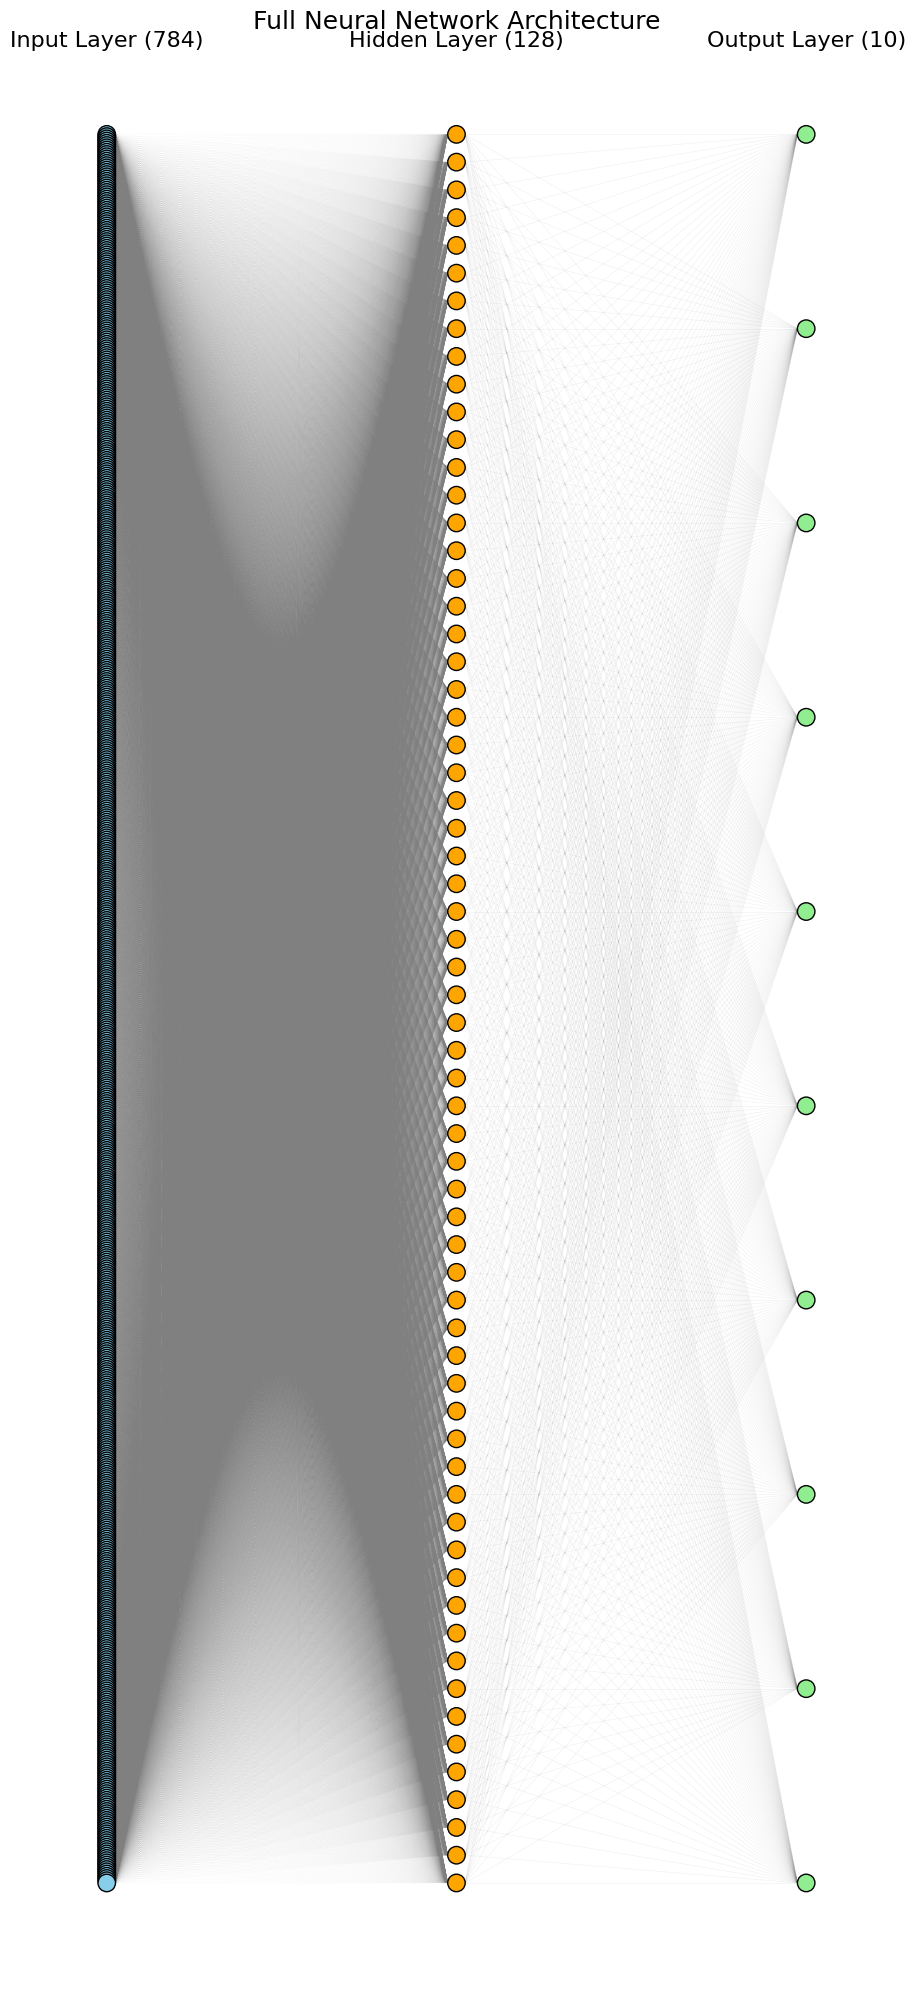

In [ ]:
def plot_full_network_architecture(W1, W2):
    import matplotlib.patches as patches

    input_neurons = W1.shape[0]   # 784
    hidden_neurons = W1.shape[1]  # 128
    output_neurons = W2.shape[1]  # 10

    fig_height = 20  # adjust to get enough vertical space
    fig_width = 12

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.set_aspect('equal')
    ax.axis('off')

    # X positions for each layer
    x_input = 0
    x_hidden = 4
    x_output = 8

    # Vertical spacing so neurons fit in figure height
    y_input = np.linspace(fig_height / 2, -fig_height / 2, input_neurons)
    y_hidden = np.linspace(fig_height / 2, -fig_height / 2, hidden_neurons)
    y_output = np.linspace(fig_height / 2, -fig_height / 2, output_neurons)

    neuron_radius = 0.1  # smaller radius because of many neurons

    # Draw neurons
    def draw_neuron(x, y, color):
        circle = patches.Circle((x, y), neuron_radius, edgecolor='black', facecolor=color, zorder=3)
        ax.add_patch(circle)

    # Draw all neurons
    for y in y_input:
        draw_neuron(x_input, y, 'skyblue')

    for y in y_hidden:
        draw_neuron(x_hidden, y, 'orange')

    for y in y_output:
        draw_neuron(x_output, y, 'lightgreen')

    # Draw connections Input->Hidden
    # For performance, we'll draw connections with low alpha and thin linewidth
    for i, y_i in enumerate(y_input):
        for j, y_j in enumerate(y_hidden):
            ax.plot([x_input + neuron_radius, x_hidden - neuron_radius], [y_i, y_j],
                    color='gray', alpha=0.05, linewidth=0.3, zorder=1)

    # Draw connections Hidden->Output
    for j, y_j in enumerate(y_hidden):
        for k, y_k in enumerate(y_output):
            ax.plot([x_hidden + neuron_radius, x_output - neuron_radius], [y_j, y_k],
                    color='gray', alpha=0.1, linewidth=0.5, zorder=1)

    # Titles for layers
    ax.text(x_input, fig_height / 2 + 1, "Input Layer (784)", fontsize=16, ha='center')
    ax.text(x_hidden, fig_height / 2 + 1, "Hidden Layer (128)", fontsize=16, ha='center')
    ax.text(x_output, fig_height / 2 + 1, "Output Layer (10)", fontsize=16, ha='center')

    plt.title("Full Neural Network Architecture", fontsize=18)
    plt.tight_layout()
    plt.show()

# Call after training/testing
plot_full_network_architecture(W1, W2)

